In [1]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BES_reduced",
#            "BESnumeric"
          ]

In [182]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

from IPython.display import display, display_html 

import Jupyter_module_loader
from utility import *
# display_components, display_pca_data, weighted_kde, setup_directories,\
#                     get_manifest, get_small_files, clean_filename, create_subdir, amalgamate_waves

In [3]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()




In [4]:
# %%time
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

# dataset_filename = "BES2015_W8_v1.6.dta"

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
#     elif df=="BES_reduced_with_na":
#         globals()[df] = pd.read_msgpack(data_subfolder + "BES_reduced" + '.msgpack')
#         nans = pd.read_msgpack(data_subfolder + "nans" + '.msgpack')
#         globals()[df][nans] = np.nan
# #         globals()[df] = temp[nans]
#         del nans
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
#         globals()[df] = globals()[df].apply(pd.to_numeric,downcast='integer')
    print(df+":")
    globals()[df].info(memory_usage='deep')    
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

BES_Panel:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73703 entries, 0 to 73702
Columns: 5692 entries, id to small_mii_catW10
dtypes: category(5483), datetime64[ns](31), float32(4), float64(154), int8(18), object(2)
memory usage: 506.4 MB
BES_reduced_with_na:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73703 entries, 0 to 73702
Columns: 6864 entries, ageW1 to partyContactConW12_Yes
dtypes: float32(6864)
memory usage: 1.9 GB
var_type (5692, 13)


In [210]:
def sort_by_wave(lst):
    dict_by_wave = {int(x.split("W")[-1]):x for x in lst}
    return [dict_by_wave[x] for x in sorted(dict_by_wave.keys())]
    

In [5]:
## climate change?


In [6]:
[x for x in BES_Panel.columns if "climate" in x]

['climateChangeW7', 'climateChangeW10', 'climateChangeW11']

In [7]:
climateChange = amalgamate_waves(BES_Panel, "climate")

Amalgamating variables: 
{7: 'climateChangeW7', 10: 'climateChangeW10', 11: 'climateChangeW11'}


In [8]:
Notebook_Treatment = "RandomFunPlots_December"
output_subfolder = BES_output_folder + os.sep + "RandomFunPlots_December" + os.sep
notebook_subfolder = create_subdir(BES_output_folder,Notebook_Treatment)

In [9]:
Treatment = "ClimateChange"
output_subfolder = create_subdir(notebook_subfolder,Treatment)

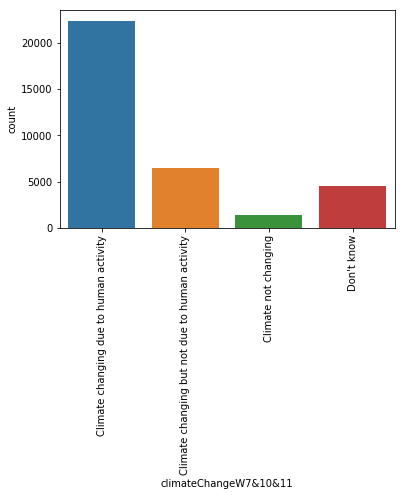

In [10]:
sns.countplot(climateChange);
plt.xticks(rotation=90);
fname = output_subfolder + "climate_change_raw_numbers" + ".png"
plt.savefig( fname, bbox_inches='tight' )

In [11]:
[x for x in BES_Panel.columns if "enviro" in x]

['enviroProtectionW1',
 'enviroProtectionW2',
 'enviroProtectionW3',
 'enviroProtectionW4',
 'enviroGrowthW4',
 'enviroProtectionW6',
 'enviroProtectionW7',
 'enviroGrowthW7',
 'enviroProtectionW12',
 'enviroProtectionW14']

In [21]:
enviroGrowth = amalgamate_waves(BES_Panel, "enviroGrowth")

Amalgamating variables: 
{4: 'enviroGrowthW4', 7: 'enviroGrowthW7'}


In [37]:
enviroGrowth.value_counts().sum()

41264

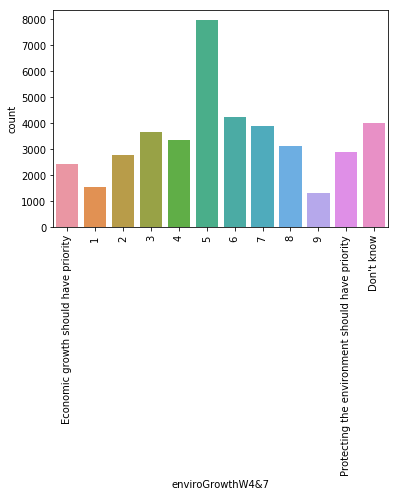

In [26]:
sns.countplot(enviroGrowth);
plt.xticks(rotation=90);
fname = output_subfolder + "enviroGrowth_raw_numbers" + ".png"
plt.savefig( fname, bbox_inches='tight' )

In [23]:
enviroProtection = amalgamate_waves(BES_Panel, "enviroProtection")

Amalgamating variables: 
{1: 'enviroProtectionW1', 2: 'enviroProtectionW2', 3: 'enviroProtectionW3', 4: 'enviroProtectionW4', 6: 'enviroProtectionW6', 7: 'enviroProtectionW7', 12: 'enviroProtectionW12', 14: 'enviroProtectionW14'}


In [39]:
enviroProtection.value_counts()

Not gone far enough           22066
About right                   18841
Not gone nearly far enough    10850
Don't know                     7234
Gone too far                   6560
Gone much too far              2966
Name: enviroProtectionW1&2&3&4&6&7&12&14, dtype: int64

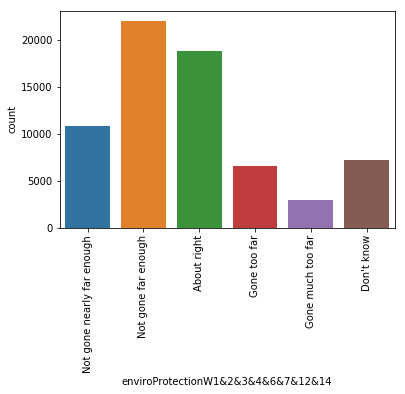

In [27]:
sns.countplot(enviroProtection);
plt.xticks(rotation=90);
fname = output_subfolder + "enviroProtection_raw_numbers" + ".png"
plt.savefig( fname, bbox_inches='tight' )

In [35]:
pd.crosstab(index = climateChange, columns = enviroProtection, normalize='all', margins=True).round(2)

enviroProtectionW1&2&3&4&6&7&12&14              Not gone nearly far enough  \
climateChangeW7&10&11                                                        
Climate changing due to human activity                                0.14   
Climate changing but not due to human activity                        0.01   
Climate not changing                                                  0.00   
Don't know                                                            0.00   
All                                                                   0.16   

enviroProtectionW1&2&3&4&6&7&12&14              Not gone far enough  \
climateChangeW7&10&11                                                 
Climate changing due to human activity                         0.25   
Climate changing but not due to human activity                 0.03   
Climate not changing                                           0.01   
Don't know                                                     0.02   
All                                                            0.31   

enviroProtectionW1&2&3&4&6&7&12&14              About right  Gone too far  \
climateChangeW7&10&11                                                       
Climate changing due to human activity                 0.15          0.04   
Climate changing but not due to human activity         0.08          0.04   
Climate not changing                                   0.02          0.01   
Don't know                                             0.04          0.01   
All                                                    0.29          0.09   

enviroProtectionW1&2&3&4&6&7&12&14              Gone much too far  Don't know  \
climateChangeW7&10&11                                                           
Climate changing due to human activity                       0.01        0.04   
Climate changing but not due to human activity               0.02        0.01   
Climate not changing                                         0.01        0.00   
Don't know                                                   0.00        0.04   
All                                                          0.04        0.10   

enviroProtectionW1&2&3&4&6&7&12&14               All  
climateChangeW7&10&11                                 
Climate changing due to human activity          0.64  
Climate changing but not due to human activity  0.19  
Climate not changing                            0.04  
Don't know                                      0.13  
All                                             1.00

In [44]:
enviroProtection_hardcore = (climateChange=="Climate changing due to human activity") & (enviroProtection == "Not gone nearly far enough")
enviroProtection_softcore = (climateChange=="Climate changing due to human activity") & (enviroProtection == "Not gone far enough")

In [279]:
# ep_hardcore_corrs = BES_reduced_with_na[enviroProtection_hardcore|enviroProtection_softcore].corrwith(enviroProtection_hardcore)
# ep_hardcore_corrs.drop([x for x in BES_reduced_with_na.columns if re.match("enviroProtection|climateChange", x)]).dropna().sort_values()

In [278]:
# ep_hardcore_corrs = BES_reduced_with_na.corrwith(enviroProtection_hardcore)
# ep_hardcore_corrs.drop([x for x in BES_reduced_with_na.columns if re.match("enviroProtection|climateChange", x)]).dropna().sort_values()

In [320]:
sample_size_text = "N"
correlation_text = "r"
abs_correlation_text = "abs_r"
p_value_text = "p"
corr_type = "spearman"#"pearson"

top_num = 20
round_places = 2

min_p_value = 0.01
min_variance = 0.0
min_sample_size = 500

pattern = "enviroProtection|climateChange"
name = "enviroProtection_hardcore"

In [321]:
%%time

df1 = BES_reduced_with_na

pattern_list = [x for x in df1.columns if re.match(pattern,x)]
focal_mask = enviroProtection_hardcore.notnull()
variances = df1[focal_mask].var()
low_var_list = list(variances[variances<min_variance].index)
sample_sizes = df1[focal_mask].notnull().sum()
low_sample_size_list = list(sample_sizes[sample_sizes<min_sample_size].index)

drop_list = pattern_list+low_var_list+low_sample_size_list
df1.drop(drop_list,axis=1,inplace=True)

Wall time: 47.2 s


In [322]:
%%time
if corr_type == "pearson":
    df = df1.apply(lambda x: corr_simple_pearsonr(x,enviroProtection_hardcore)).apply(pd.Series)
elif corr_type == "spearman":
    df = df1.apply(lambda x: corr_simple_spearmanr(x,enviroProtection_hardcore)).apply(pd.Series)
    
df.columns = [correlation_text,p_value_text,sample_size_text]
df[sample_size_text] = df[sample_size_text].astype('int')
df[abs_correlation_text] = df[correlation_text].abs()

Wall time: 1min


In [323]:
zero_var_other_way_around_list = list(df[df[correlation_text].isnull()].index)
df.dropna(inplace=True)

insignificant_list = df[df[p_value_text]>min_p_value].index
df.drop(insignificant_list,inplace=True)

df.sort_values(by=abs_correlation_text,ascending=False,inplace=True)
# df=df.round(round_places)

In [324]:
stub_dict = {}
drop_list = []
# drop repeated references to same variable in different waves???
# so, what about different categories??? eg. blahWX_subcat
# how about, just replace wave match as "X"
# create a dictionary keyed on the top corr variable with all the drops inside
for ind in df.index:
    waveless = remove_wave(ind)
    if waveless in stub_dict.keys():
        drop_list.append(ind)
        stub_dict[waveless].append(ind)
    else:
        stub_dict[waveless] = [ind]
df.drop(drop_list,inplace=True)

In [325]:
def display_corr():
    df.index = [x[0:60] for x in df.index]
    df[correlation_text] = df[correlation_text].round(round_places)
    
    df1 = df.sort_values(by=correlation_text, ascending=False)[0:top_num][[correlation_text,p_value_text,sample_size_text]]
    df2 = df.sort_values(by=correlation_text)[0:top_num][[correlation_text,p_value_text,sample_size_text]]
    
    df1[p_value_text]     = df1[p_value_text].apply(lambda x: "{0:0.2f}".format(x))
    df2[p_value_text]     = df2[p_value_text].apply(lambda x: "{0:0.2f}".format(x))
#     df1[[correlation_text,p_value_text]] = df1[[correlation_text,p_value_text]].apply(lambda x: "{0:0.2f}".format(x))
#     df2[[correlation_text,p_value_text]] = df2[[correlation_text,p_value_text]].apply(lambda x: "{0:0.2f}".format(x))

    df1_caption = "Top "+str(top_num)+ " positive "+"("+corr_type+")"+" correlations for "+name
    df2_caption = "Top "+str(top_num)+ " negative "+"("+corr_type+")"+" correlations for "+name

    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption(df1_caption)
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption(df2_caption)

    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)


In [326]:
display_corr()

Top 20 positive (spearman) correlations for enviroProtection_hardcore 
 
 
 r 
 p 
 N 
 
 
 enviroGrowthW7__Protecting the environment should have prior 
 0.31 
 0.00 
 27820 
 
 likeGrnW10__Strongly like 
 0.3 
 0.00 
 26548 
 
 likeLucasW10__Strongly like 
 0.3 
 0.00 
 17585 
 
 bestPMW10_Jeremy Corbyn 
 0.3 
 0.00 
 18699 
 
 ptvGrnW10__Very likely 
 0.3 
 0.00 
 26909 
 
 euScepticismW7__Work towards single European government 
 0.28 
 0.00 
 6784 
 
 successReduceInequalityGrnW12_Yes 
 0.28 
 0.00 
 6432 
 
 competentLucasW13__A great deal of competence 
 0.26 
 0.00 
 10517 
 
 euLeaveBigBusinessW10__Much more likely 
 0.23 
 0.00 
 26196 
 
 natSecuritySelfW7__Protect civil liberties 
 0.23 
 0.00 
 6593 
 
 partyIdSqueezeW10_Green Party 
 0.23 
 0.00 
 6624 
 
 asylumMoreW13__Many more 
 0.22 
 0.00 
 28448 
 
 handleMIIGrnW7__Very well 
 0.22 
 0.00 
 5013 
 
 leaveImpactBritainW10__A very large impact 
 0.22 
 0.00 
 27826 
 
 immigSelfW10__Allow many more 
 0.22 
 0.00 
 26967 
 
 immigEconW10__Good for economy 
 0.22 
 0.00 
 28118 
 
 immigCulturalW10__Enriches cultural life 
 0.22 
 0.00 
 28289 
 
 redistUKIPW12__Government should be less concerned about equ 
 0.22 
 0.00 
 5637 
 
 likeSturgeonW11__Strongly like 
 0.22 
 0.00 
 28212 
 
 spendLeast3W2_Defence 
 0.22 
 0.00 
 9716 
 
 
 Top 20 negative (spearman) correlations for enviroProtection_hardcore 
 
 
 r 
 p 
 N 
 
 
 likeNuttallW10__Strongly like 
 -0.31 
 0.00 
 11536 
 
 leftRightW10__Right 
 -0.29 
 0.00 
 23691 
 
 approveUKGovtW10__Strongly approve 
 -0.27 
 0.00 
 28755 
 
 effectsEUWorkersW10__Much better 
 -0.27 
 0.00 
 27529 
 
 likeSEvansW10__Strongly like 
 -0.27 
 0.00 
 8555 
 
 likeConW10__Strongly like 
 -0.26 
 0.00 
 27921 
 
 handleEUNegotiateW10__Very well 
 -0.26 
 0.00 
 27489 
 
 effectsEUEconW10__Much better 
 -0.26 
 0.00 
 27435 
 
 conLookAfterBAW10__Very closely 
 -0.25 
 0.00 
 21008 
 
 euLeaveVoiceW10__Much higher 
 -0.25 
 0.00 
 27941 
 
 natSecuritySpendingW7__A lot more 
 -0.25 
 0.00 
 7077 
 
 likeMayW10__Strongly like 
 -0.25 
 0.00 
 27884 
 
 handleMIIConW12__Very well 
 -0.24 
 0.00 
 7013 
 
 generalElectionVoteUnsqueezeW11_Conservative 
 -0.24 
 0.00 
 20258 
 
 ptvConW10__Very likely 
 -0.24 
 0.00 
 26934 
 
 spendLeast3W2_Environmental Policy 
 -0.24 
 0.00 
 9716 
 
 effectsEUNHSW11__Much better 
 -0.24 
 0.00 
 28091 
 
 euPriorityBalanceW10__Control immigration 
 -0.24 
 0.00 
 26644 
 
 likeUKIPW10__Strongly like 
 -0.23 
 0.00 
 28067 
 
 ukipLookAfterUnempW10__Very closely 
 -0.23 
 0.00 
 18102

In [169]:

# var_type.loc["turnoutUKGeneralW1","pruned"]
for ind in df.index:
    print(get_pruned(ind))

ptvGrn
enviroGrowth
likeLucas
euScepticism
likeGrn
ptvGrn
bestPM
ptvGrn
likeLucas
leftRight
likeNuttall
likeGrn
bestPM
approveUKGovt
successReduceInequalityGrn
likeGrn
effectsEUWorkers
ptvGrn
likeLucas
likeGrn
enviroGrowth
likeLucas
bestPM
ptvGrn
approveUKGovt
leftRight
likeGrn
effectsEUWorkers
ptvGrn
competentLucas
likeMay
likeCon
likeMay
competentLucas
natSecuritySpending
likeSEvans
bestPM
handleEUNegotiate
effectsEUEcon
climateChange
leftRight
likeGrn
handleEUNegotiate
likeCon
bestPM
effectsEUEcon
climateChange
ptvGrn
likeMay
conLookAfterBA
handleEUNegotiate
likeCon
euLeaveVoice
likeGrn
euLeaveVoice
keepNukes
leftRight
effectsEUNHS
ptvGrn
keepNukes
handleMIICon
leftRight
al_scale
effectsEUWorkers
likeLucas
al_scale
euPriorityBalance
ptvGrn
generalElectionVoteUnsqueeze
effectsEUNHS
EUIntegrationSelf
ptvGrn
asylumMore
natSecuritySelf
overseasAid
euLeaveVoice
handleMIIGrn
spendLeast
immigSelf
effectsEUNHS
immigrantsWelfareState
likeGrn
ptvCon
effectsEUEcon
ptvCon
euPriorityBalance
like

competentFarron
inequalityChangeLarger
participation
changeNHSLab
efficacyNotUnderstand
responsibleDebtGlobalBanks
labHandleLevelCrime
discrimWomen
negotiationSpecifics_none
tuSupport
satDemEU
resourceAccess
negotiationSpecifics
labHandleNHS
lrLab
ukipFear
profile_newspaper
warmGreece
likeFarron
small_mii_cat
partyContactLab
polAttention
small_mii_cat
efficacyUnderstand
britishness
scotFairShare
lrLD
fbInfo
natSecurityCon
ukCoopTrade
eesEUIntegrationCon
responsibleDebtConservatives
redistCon
efficacyNotUnderstand
populism
coalitionDontDeliver
conPriorities_nhs
bestOnMII
approveScotGovt
mii_cat
EUIntegrationLab
ldUnited
scotElectionVoteConst
partyContactGrn
econGenRetro
partyContact
empathy
mpSecondJob
efficacyNotUnderstand
ukipUnited
resourceAccess
spendMost
lrLD
partyContactOtherParty
grnUnited
small_mii_cat
immigLab
fbInfo
cutsTooFarNHS
achieveReduceImmigCon
discussPolDays
lrLD
euMIISmall
labHandleCostLive
conPartnerUKIP
participation
newspaper
britishness
LRAL_mii_cat
ldTone
busines

noChanceCoalitionPC
spendMost
selfRedistCertain
blameLeave
generalElectionVote
turnoutUKGeneral
partyIdSqueeze
profile_newspaper
econPersonalRetro
labPriorities_costLive
parliamentSupport
ukipPriorities_costLive
ukipPriorities_school
EUIntegrationLD
mii_cat
generalElectionVote
mii_cat
spendMost
euID
partyIdSqueeze
accessJobReference
partyContactOtherParty
immigGreen
ukipPriorities
profile_marital_stat
reasonForVote
partyIdSqueeze
partyId
conPriorities_econ
mii_cat
partyContactCon
dutyToVote
certaintyEUCon
partyIdSqueeze
mapEcon
certaintyEUUKIP
responsibleEducationLD
labUnited
responsibleEducationDontKnow
eesEUIntegrationLD
turnoutUKGeneral
achieveReduceImmigUKIP
discussantVoteName
scotRefExpectation
EUIntegrationUKIP
partyContactOtherParty
mii_cat
ukipPriorities_crime
infoSourceRadio
profile_socgrade
responsibleCostLiveCon
small_mii_cat
generalElectionVoteSqueeze
redistGreen
participation
mii_cat
csplRank
prefTradeoff
profile_sexuality
partyContactLab
blameLeave
participation
scotElect

profile_newspaper
euMIISmall
miilabel
mii_cat
redistLab
LRAL_mii_cat
small_mii_cat
gor
profile_newspaper
polKnowMay
socialDes_dk
ns_sec
gor
profile_past_vote
labAngry
profile_newspaper
profile_newspaper
mii_cat
registered
mii_cat
miilabel
education
EUMIICategory
gor
profile_ethnicity
redistLab
EUMIICategory
likeClegg
mii_cat
profile_religion
singlePartyEffective
miilabel
gor
miilabel
mii_cat
labUnited
fatherCountryBorn
EUMIICategory
euKnow
mii_cat
euroElectionVote
profile_religion
mainSourceIncome
ldUnited
miilabel
euRefTurnoutRetro
belongGroup
labUnited
mii_cat
efficacyPolCare
disability
gor
responsibleEconConservatives
profile_newspaper
schoolKidsInHouse
responsibleImmigDontKnow
gor
mii_cat
mii_cat
small_mii_cat
education
mii_cat
mii_cat
gor
certaintyScotUnion
profile_religion
partyId
gor
bestOnMII
polKnowAssad
noChanceCoalitionLD
labUnited
otherCitizen
mii_cat
generalElectionVote
gor
mii_cat
bestOnMII
achieveReduceImmigLab
ns_sec
education
polKnowMerkel
mii_cat
euKnow
profile_work_t

In [240]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.325, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df1, header_columns=0, col_width=2.0);

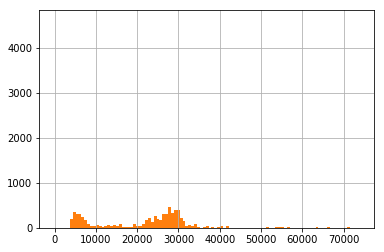

In [123]:
df["p-value"].hist(bins=100)
df["sample size"].hist(bins=100)

In [118]:
df1["blackEquality2W14__Gone much too far"][enviroProtection_hardcore.notnull()].var()
# enviroProtection_hardcore[df1["blackEquality2W14__Gone much too far"].notnull()].var()

1.1621054410934448

In [42]:
pd.crosstab(index = climateChange, columns = enviroGrowth, normalize='index', margins=True).round(2)

enviroGrowthW4&7                                Economic growth should have priority  \
climateChangeW7&10&11                                                                  
Climate changing due to human activity                                          0.03   
Climate changing but not due to human activity                                  0.14   
Climate not changing                                                            0.20   
Don't know                                                                      0.05   
All                                                                             0.06   

enviroGrowthW4&7                                   1     2     3     4     5  \
climateChangeW7&10&11                                                          
Climate changing due to human activity          0.02  0.05  0.07  0.09  0.20   
Climate changing but not due to human activity  0.08  0.12  0.12  0.09  0.19   
Climate not changing                            0.10  0.13  0.11  0.07  0.15   
Don't know                                      0.04  0.07  0.09  0.06  0.19   
All                                             0.04  0.07  0.09  0.08  0.20   

enviroGrowthW4&7                                   6     7     8     9  \
climateChangeW7&10&11                                                    
Climate changing due to human activity          0.12  0.12  0.10  0.04   
Climate changing but not due to human activity  0.07  0.06  0.04  0.01   
Climate not changing                            0.04  0.04  0.03  0.02   
Don't know                                      0.06  0.05  0.03  0.01   
All                                             0.10  0.09  0.08  0.03   

enviroGrowthW4&7                                Protecting the environment should have priority  \
climateChangeW7&10&11                                                                             
Climate changing due to human activity                                                     0.09   
Climate changing but not due to human activity                                             0.02   
Climate not changing                                                                       0.02   
Don't know                                                                                 0.02   
All                                                                                        0.07   

enviroGrowthW4&7                                Don't know  
climateChangeW7&10&11                                       
Climate changing due to human activity                0.07  
Climate changing but not due to human activity        0.05  
Climate not changing                                  0.08  
Don't know                                            0.33  
All                                                   0.10

In [ ]:
## immigSelf distribution by Leave/Remain

In [9]:
[x for x in BES_reduced_with_na.columns if re.match("immigSelf", x)]

['immigSelfW7__Allow many more',
 'immigSelfW8__Allow many more',
 'immigSelfW9__Allow many more',
 'immigSelfW10__Allow many more',
 'immigSelfW11__Allow many more',
 'immigSelfW12__Allow many more',
 'immigSelfW14__Allow many more']

In [54]:
Leavers = BES_Panel["profile_eurefvote"] =="Leave the EU"
Remainers = BES_Panel["profile_eurefvote"] =="Stay/remain in the EU"

In [11]:
amalg_imm = amalgamate_waves(BES_reduced_with_na,"immigSelf",forward_fill=False)
euref_imm = amalgamate_waves(BES_reduced_with_na,"euRefVoteW",forward_fill=False)

In [12]:
amalg_imm.notnull().sum(),euref_imm.notnull().sum()

(56639, 69801)

In [13]:
prof_euref_imm = (BES_Panel["profile_eurefvote"]=="Leave the EU")
prof_euref_imm[BES_Panel["profile_eurefvote"]=="Don't know"] = np.nan

In [14]:
amalg_imm[euref_imm.notnull()].notnull().sum(), amalg_imm[prof_euref_imm.notnull()].notnull().sum()

(55233, 56296)

In [15]:
output_subfolder = BES_output_folder + os.sep + "Immigration_sentiment_by_euref" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


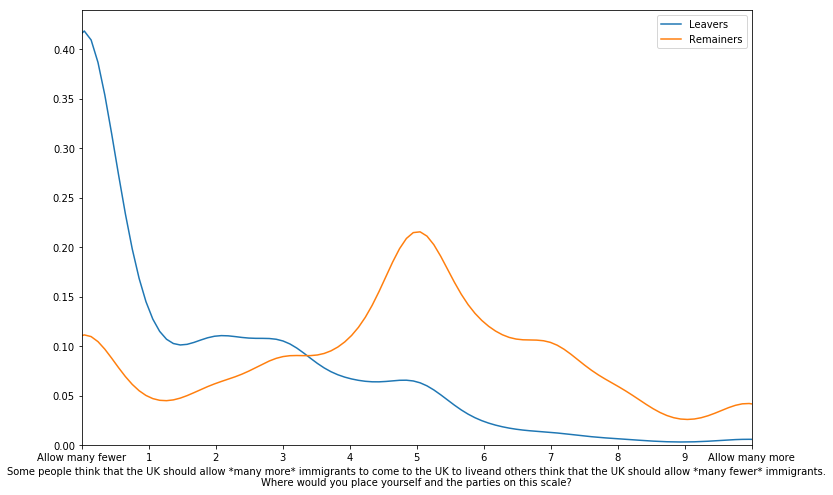

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(12,8))

Leave_imm =  amalg_imm[prof_euref_imm==1]
Remainer_imm = amalg_imm[prof_euref_imm==0]

sns.kdeplot(Leave_imm,     label="Leavers", bw=.5, ax = axes);#, cut=1);
sns.kdeplot(Remainer_imm,  label="Remainers", bw=.5, ax = axes);#, cut=1);

# ax.set_ylim([0,.2])
axes.set_xlim([0,10]);
axes.set_xticks(list(range(0,11)))
axes.set_xticklabels(BES_Panel["immigSelfW14"].cat.categories[0:11]);
axes.set_xlabel("Some people think that the UK should allow *many more* immigrants to come to the UK to live"+\
                "and others think that the UK should allow *many fewer* immigrants."+\
                "\nWhere would you place yourself and the parties on this scale?");

fname = output_subfolder + "Immigration_sentiment_by_euref" + ".png"
plt.savefig( fname, bbox_inches='tight' )

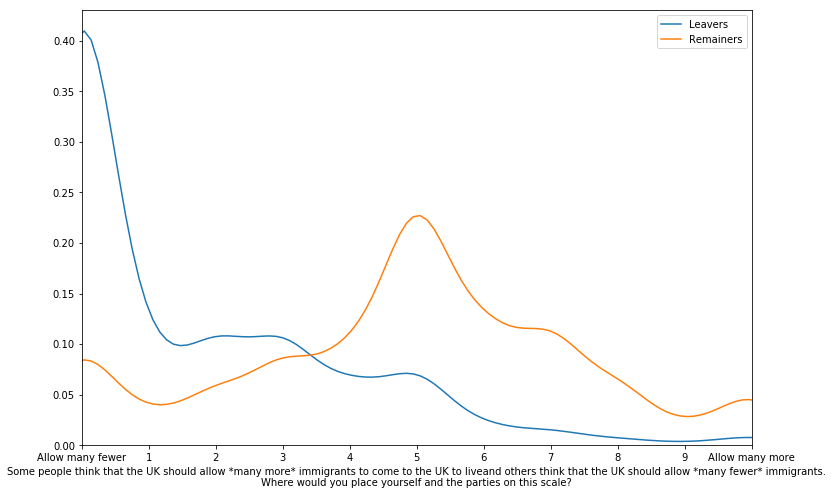

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(12,8))

Leave_imm =  amalg_imm[euref_imm==1]
Remainer_imm = amalg_imm[euref_imm==0]

sns.kdeplot(Leave_imm,     label="Leavers", bw=.5, ax = axes);#, cut=1);
sns.kdeplot(Remainer_imm,  label="Remainers", bw=.5, ax = axes);#, cut=1);

# ax.set_ylim([0,.2])
axes.set_xlim([0,10]);
axes.set_xticks(list(range(0,11)))
axes.set_xticklabels(BES_Panel["immigSelfW14"].cat.categories[0:11]);
axes.set_xlabel("Some people think that the UK should allow *many more* immigrants to come to the UK to live"+\
                "and others think that the UK should allow *many fewer* immigrants."+\
                "\nWhere would you place yourself and the parties on this scale?");

# fname = output_subfolder + "Immigration_sentiment_by_euref" + ".png"
# plt.savefig( fname, bbox_inches='tight' )

In [18]:
Leavers   = (BES_Panel['profile_eurefvote'] == "Leave the EU")
Remainers = (BES_Panel['profile_eurefvote'] == "Stay/remain in the EU")
amalgamated_euMIISmall = amalgamate_waves(BES_Panel, 'euMIISmallW', forward_fill=True)


In [ ]:

SovOrImmLeavers = Leavers&amalgamated_euMIISmall.notnull()

Sov = amalgamated_euMIISmall[SovOrImmLeavers]
BES_sov = BES_reduced[SovOrImmLeavers]
drop_vars = [x for x in BES_reduced.columns if ("euRefVote" in x) or ("profile_eurefvote" in x)\
             or ("euMII" in x) or ("EUMII" in x)]
BES_sov = BES_sov.drop(drop_vars , axis=1)


In [20]:
sovereignty = "Sovereignty/EU bureaucracy"
immigration = "Immigration"
Sov = (amalgamated_euMIISmall==sovereignty)
Imm = (amalgamated_euMIISmall==immigration)
Oth = amalgamated_euMIISmall.notnull() & ~Imm & ~Sov


In [24]:
Sov[Leavers].sum(), Imm[Leavers].sum(), Oth[Leavers].sum()

(3933, 3391, 4088)

In [ ]:
economy = "Economy"
cosmopolitanism = "Cosmopolitanism"
Eco = (amalgamated_euMIISmall==sovereignty)
Cos = (amalgamated_euMIISmall==immigration)

In [25]:
amalgamated_euMIISmall[Remainers].value_counts()

Economy                                   3717
Cosmopolitanism                           1190
Foreign policy                             992
Protection of rights                       899
No content to reason                       882
Campaign/outcome fairness                  778
Other                                      606
Immigration                                495
Other stability or uncertainty concern     449
Sovereignty/EU bureaucracy                 410
Social identity/partisanship               330
Family                                     202
EU spending/regulations/cost               197
EU integration/stability                    64
British/english identity                    34
Name: euMIISmallW8, dtype: int64

In [48]:
# cat_col_mar_dict = {} # category-colour-marker dictionary

# colours = cycle('ycmkgbr')
# markers = cycle('v^<>,oD*x+')

def make_categorical_density_plot():
    fig, axes = plt.subplots(1, 1, figsize=(16,10))    
    sov_vars = (BES_reduced_with_na[[x for x in BES_reduced_with_na.columns if re.match(cat_var+"_", x)]][mask&amalg_imm.notnull()]==1)\
                .sum().sort_values(ascending=False)
    sov_vars = sov_vars.drop(sov_vars[sov_vars<min_sample].index)
    if len(sov_vars.index)==0:
        return
    
    for sov in sov_vars.index:
#         if sov not in cat_col_mar_dict.keys(): # try to give mii consistent colour, marker pairs
#             cat_col_mar_dict[sov] = (next(colours),next(markers))        
        sov_imm = amalg_imm[(BES_reduced_with_na[sov]==1.0)&mask]
        base_label = sov.split("_")[-1]

        (col, mar) = get_cat_col_mar(base_label)
        label = base_label +"(N="+str(sov_vars.loc[sov])+")"
        sns.kdeplot(sov_imm,
                    label=label,
                    bw=.5,
                    ax = axes,
                    color = col,
                    marker = mar,
                    alpha = .75);

    sns.kdeplot(amalg_imm,
                label="Everyone-Leaver/Remainer/Neither"+"(N="+str(amalg_imm.notnull().sum())+")",
                bw=.5,
                ax = axes,
                color = 'k',
                linewidth=7.0,
                alpha = .75);       

    # axes.set_ylim([0,.6])
    axes.set_xlim([0,10]);
    axes.set_xticks(list(range(0,11)))
    axes.set_xticklabels(BES_Panel["immigSelfW14"].cat.categories[0:11]);
    axes.set_xlabel("Some people think that the UK should allow *many more* immigrants to come to the UK to live"+\
                    "and others think that the UK should allow *many fewer* immigrants."+\
                    "\nWhere would you place yourself and the parties on this scale?");
    plt.legend(loc='upper right',title=cat_var);
    wave_descr = BES_file_manifest[ (BES_file_manifest["Only_or_Combined"]=="Only")\
                     & (BES_file_manifest["Wave No"]==wave) ]["Friendlier_Description"].values[0]    
    plt.title(question+"\n"\
             +wave_descr\
             +"\n"+subtitle);

    fname = cat_var + "_" + subtitle + ".png"
    plt.savefig( output_subfolder + clean_filename(fname), bbox_inches='tight' )
#     plt.close()

In [49]:
Treatment = "Sovereignty_vs_Immigration"
base_folder = create_subdir(BES_output_folder, Treatment)

sub_treatment = "category_by_immigself"
output_subfolder = create_subdir(base_folder, sub_treatment)

In [47]:
# get_cat_col_mar('immigration')

In [58]:
amalg_imm = amalgamate_waves(BES_reduced_with_na,"immigSelf",forward_fill=False)
masks = {"Leavers":"Leave the EU","Remainers":"Stay/remain in the EU","Don't know":"Don't know"}
# cat_vars = ["euMIISmallW7","euMIISmallW8","EUMIICategoryW7","EUMIICategoryW8"]
# cat_vars = sorted(list(set(["_".join(x.split("_")[:-1]) for x in BES_reduced_with_na.columns if re.match("bestOnMII|miilabel|small_mii_cat|mii_cat|LRAL_mii_cat|EUMIICategory|euMIISmall",x) ])))
cat_vars = sorted(list(set(["_".join(x.split("_")[:-1]) for x in BES_reduced_with_na.columns if re.match("EUMIICategory",x) ])))
min_sample = 100

for cat_var in cat_vars:
    question = "What matters most to you when deciding how to vote in the EU referendum?"
    wave = int(re.search("W(\d+)",cat_var).groups()[0])
    for subtitle,mask_cat in masks.items():
        print(cat_var,subtitle)
        if ("euRefVoteW"+str(wave)) not in BES_Panel.columns:
            mask = (BES_Panel["profile_eurefvote"]==mask_cat)
        else:
            mask = (BES_Panel["euRefVoteW"+str(wave)]==mask_cat)

        make_categorical_density_plot()


EUMIICategoryW7 Leavers
EUMIICategoryW7 Remainers
EUMIICategoryW7 Don't know
EUMIICategoryW8 Leavers
EUMIICategoryW8 Remainers
EUMIICategoryW8 Don't know


In [211]:
lst = ['LRAL_mii_catW1',
 'LRAL_mii_catW10',
 'LRAL_mii_catW11',
 'LRAL_mii_catW12',
 'LRAL_mii_catW13',
 'LRAL_mii_catW2',
 'LRAL_mii_catW3',
 'LRAL_mii_catW4',
 'LRAL_mii_catW5',
 'LRAL_mii_catW6',
 'LRAL_mii_catW7',
 'LRAL_mii_catW8',
 'LRAL_mii_catW9']
sort_by_wave(lst)

['LRAL_mii_catW1',
 'LRAL_mii_catW2',
 'LRAL_mii_catW3',
 'LRAL_mii_catW4',
 'LRAL_mii_catW5',
 'LRAL_mii_catW6',
 'LRAL_mii_catW7',
 'LRAL_mii_catW8',
 'LRAL_mii_catW9',
 'LRAL_mii_catW10',
 'LRAL_mii_catW11',
 'LRAL_mii_catW12',
 'LRAL_mii_catW13']

In [208]:
sorted(list(set(["_".join(x.split("_")[:-1]) for x in BES_reduced_with_na.columns if re.match("bestOnMII|miilabel|small_mii_cat|mii_cat|LRAL_mii_cat|EUMIICategory|euMIISmall",x) ])))

['EUMIICategoryW7',
 'EUMIICategoryW8',
 'LRAL_mii_catW1',
 'LRAL_mii_catW10',
 'LRAL_mii_catW11',
 'LRAL_mii_catW12',
 'LRAL_mii_catW13',
 'LRAL_mii_catW2',
 'LRAL_mii_catW3',
 'LRAL_mii_catW4',
 'LRAL_mii_catW5',
 'LRAL_mii_catW6',
 'LRAL_mii_catW7',
 'LRAL_mii_catW8',
 'LRAL_mii_catW9',
 'bestOnMIIW1',
 'bestOnMIIW10',
 'bestOnMIIW11',
 'bestOnMIIW12',
 'bestOnMIIW13',
 'bestOnMIIW14',
 'bestOnMIIW2',
 'bestOnMIIW3',
 'bestOnMIIW4',
 'bestOnMIIW5',
 'bestOnMIIW6',
 'bestOnMIIW7',
 'bestOnMIIW8',
 'bestOnMIIW9',
 'euMIISmallW7',
 'euMIISmallW8',
 'mii_catW1',
 'mii_catW10',
 'mii_catW11',
 'mii_catW12',
 'mii_catW13',
 'mii_catW2',
 'mii_catW3',
 'mii_catW4',
 'mii_catW5',
 'mii_catW6',
 'mii_catW7',
 'mii_catW8',
 'mii_catW9',
 'miilabelW1',
 'miilabelW2',
 'miilabelW3',
 'miilabelW4',
 'miilabelW5',
 'miilabelW6',
 'small_mii_catW1',
 'small_mii_catW10',
 'small_mii_catW11',
 'small_mii_catW12',
 'small_mii_catW13',
 'small_mii_catW2',
 'small_mii_catW3',
 'small_mii_catW4',
 'smal

In [185]:
list(set([x.split("W")[0] for x in BES_reduced_with_na.columns if "mii" in x.lower()]))

['handleMIILD',
 'handleMIILab',
 'EUMIICategory',
 'bestOnMII',
 'handleMIIGrn',
 'handleMIICon',
 'miilabel',
 'small_mii_cat',
 'LRAL_mii_cat',
 'euMIISmall',
 'mii_cat',
 'handleMIIUKIP']

In [36]:
sov_cols = [x for x in BES_reduced_with_na.columns if "sov" in x.lower()]
BES_reduced_with_na[sov_cols].notnull().sum()

UKsovereigntyW7__Strongly agree            28353
UKsovereigntyW8__Strongly agree            31153
UKsovereigntyPostW10__Strongly agree       26292
UKsovereigntyPostW11__Strongly agree       27411
UKsovereigntyPostW13__Strongly agree       27330
UKsovereigntyPostW14__Strongly agree       26960
EUMIICategoryW7_sovereignty                22599
euMIISmallW7_Sovereignty/EU bureaucracy    21657
EUMIICategoryW8_sovereignty                16181
euMIISmallW8_Sovereignty/EU bureaucracy    15413
dtype: int64

In [46]:
sov_corr = BES_reduced_with_na[Leavers].corrwith(BES_reduced_with_na["EUMIICategoryW7_sovereignty"][Leavers])
sov_corr.dropna().sort_values()

euMIISmallW7_Immigration                                        -0.350165
EUMIICategoryW7_immigration                                     -0.334493
scotIndepJoinEUW1__Very likely                                  -0.206965
scotIndepJoinEUW2__Very likely                                  -0.178561
cooperateRUKGBPW2__Very likely                                  -0.175416
EUMIICategoryW7_democratic deficit                              -0.173026
euMIISmallW7_Campaign/outcome fairness                          -0.171961
euScepticismW7__Work towards single European government         -0.166412
cooperateRUKGBPW1__Very likely                                  -0.161390
polKnowHollandeW10_Prime Minister of Israel                     -0.160128
euMIISmallW7_Economy                                            -0.159556
euMIISmallW8_Immigration                                        -0.154674
snpLookAfterMCW12__Very closely                                 -0.152811
polKnowKerryW10_Secretary General of t

In [44]:
sov_corr[sov_corr.abs()>=.6].dropna().sort_index()

EUIntegrationSelfW10__Protect our independence                  0.655420
EUIntegrationSelfW11__Protect our independence                  0.660549
EUIntegrationSelfW12__Protect our independence                  0.668960
EUIntegrationSelfW13__Protect our independence                  0.653175
EUIntegrationSelfW14__Protect our independence                  0.637818
EUIntegrationSelfW1__Protect our independence                   0.618248
EUIntegrationSelfW3__Protect our independence                   0.644982
EUIntegrationSelfW4__Protect our independence                   0.632688
EUIntegrationSelfW6__Protect our independence                   0.629332
EUIntegrationSelfW7__Protect our independence                   0.687578
EUIntegrationSelfW8__Protect our independence                   0.671564
EUIntegrationSelfW9__Protect our independence                   0.654135
UKsovereigntyW7__Strongly agree                                 1.000000
UKsovereigntyW8__Strongly agree                    

In [56]:
sov_corr = BES_reduced_with_na[Remainers].corrwith(BES_reduced_with_na["euMIISmallW7_Protection of rights"][Remainers])
sov_corr.dropna().sort_values()

polKnowAssadW10_President of Syria              -0.485071
effectsEUWorkersW7__Much better                 -0.254117
leftRightW11__Right                             -0.250966
govtHandleEconW1__Very well                     -0.247156
happyScotIndepResultNoW2__Extremely happy       -0.245585
approveUKGovtW7__Strongly approve               -0.245244
leftRightW13__Right                             -0.244588
approveUKGovtW10__Strongly approve              -0.243639
approveUKGovtW11__Strongly approve              -0.243500
leftRightW7__Right                              -0.242571
leftRightW10__Right                             -0.241563
leftRightW14__Right                             -0.240772
likeConW10__Strongly like                       -0.240174
likeMayW11__Strongly like                       -0.240066
leftRightW9__Right                              -0.239517
approveUKGovtW3__Strongly approve               -0.239454
approveUKGovtW2__Strongly approve               -0.239351
leftRightW12__

In [57]:
sov_corr = BES_reduced_with_na[Remainers].corrwith(BES_reduced_with_na["euMIISmallW7_Cosmopolitanism"][Remainers])
sov_corr.dropna().sort_values()

polKnowNetanyahuW10_Prime Minister of Israel                   -0.323077
euMIISmallW7_Economy                                           -0.243396
EUIntegrationSelfW3__Protect our independence                  -0.181924
EUIntegrationSelfW1__Protect our independence                  -0.180304
EUIntegrationSelfW7__Protect our independence                  -0.176617
EUIntegrationSelfW4__Protect our independence                  -0.175497
approveEUW2_Disapprove                                         -0.168590
EUIntegrationSelfW2__Protect our independence                  -0.168480
EUMIICategoryW7_economy general                                -0.163660
EUIntegrationSelfW8__Protect our independence                  -0.162372
EUIntegrationSelfW6__Protect our independence                  -0.154300
EUIntegrationSelfW12__Protect our independence                 -0.151779
britishnessW12__Very strongly British                          -0.150780
EUIntegrationSelfW13__Protect our independence     

In [60]:
[x for x in BES_reduced_with_na.columns if "climate" in x.lower()]

['climateChangeW7__Climate not changing',
 'climateChangeW10__Climate not changing',
 'climateChangeW11__Climate not changing']

In [61]:
amalg_climate = amalgamate_waves(BES_reduced_with_na,"climateChangeW",forward_fill=False)

In [63]:
corr_climate = BES_reduced_with_na.corrwith(amalg_climate, drop=True)

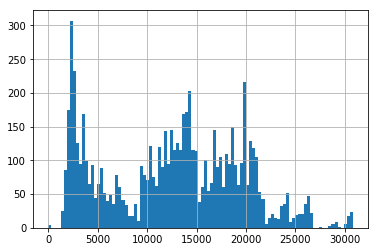

In [64]:
sample_sizes = BES_reduced_with_na[amalg_climate.notnull()].notnull().sum()
sample_sizes.hist(bins=100)

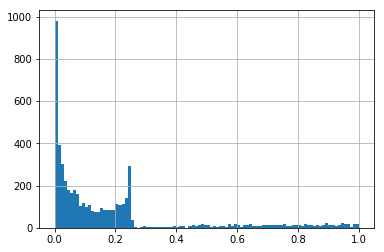

In [72]:
sample_vars = BES_reduced_with_na[amalg_climate.notnull()].var()
sample_vars[sample_vars<=1].hist(bins=100)

In [78]:
low_sample_variance = list(sample_vars[sample_vars<0.01].index)

In [77]:
low_sample_size = list(sample_sizes[sample_sizes<1000].index)

In [67]:
BES_reduced_with_na.shape

(73703, 6864)

In [82]:
corr_climate.drop(low_sample_variance+low_sample_size,errors='ignore').sort_values(ascending=False)

climateChangeW7__Climate not changing                              1.000000
climateChangeW10__Climate not changing                             0.962151
climateChangeW11__Climate not changing                             0.781685
enviroProtectionW3__Gone much too far                              0.454197
enviroProtectionW6__Gone much too far                              0.445071
enviroProtectionW7__Gone much too far                              0.437493
enviroProtectionW2__Gone much too far                              0.434092
enviroProtectionW12__Gone much too far                             0.431481
enviroProtectionW4__Gone much too far                              0.424973
enviroProtectionW1__Gone much too far                              0.411995
enviroProtectionW14__Gone much too far                             0.377303
happyTrumpW10__Extremely happy                                     0.357372
likeNuttallW10__Strongly like                                      0.355601
ptvUKIPW8__V

In [83]:
corr_df_reduced = BES_reduced_with_na.corr(min_periods=100)

In [84]:
import datetime
datetime.datetime.now()

datetime.datetime(2018, 12, 6, 7, 13, 36, 141473)

In [87]:
corr_df.to_msgpack(data_subfolder+"corr_df_reduced.msgpack")

In [86]:
data_subfolder

'../BES_analysis_data/W14_comb\\'

In [88]:
corr_df

ageW1  \
ageW1                                               1.000000   
turnoutUKGeneralW1__Very likely that I will vote    0.197255   
turnoutUKGeneralW2__Very likely that I will vote    0.188298   
turnoutUKGeneralW3__Very likely that I will vote    0.176491   
turnoutUKGeneralW4__Very likely that I will vote    0.165196   
turnoutUKGeneralW5__Very likely that I will vote    0.129728   
turnoutUKGeneralW7__Very likely that I will vote    0.140742   
turnoutUKGeneralW8__Very likely that I will vote    0.130841   
turnoutUKGeneralW9__Very likely that I will vote    0.106640   
turnoutUKGeneralW10__Very likely that I will vote   0.121050   
turnoutUKGeneralW11__Very likely that I will vote   0.111680   
turnoutUKGeneralW12__Very likely that I will vote   0.109237   
generalElectionCertaintyW1__Completely certain      0.160816   
generalElectionCertaintyW2__Completely certain      0.160691   
generalElectionCertaintyW3__Completely certain      0.149089   
generalElectionCertaintyW4__Completely certain      0.143208   
generalElectionCertaintyUnsqW5__Completely certain  0.117682   
generalElectionCertaintySqW5__Completely certain    0.047833   
generalElectionCertaintyW5__Completely certain      0.134593   
generalElectionCertaintyW9__Completely certain      0.101503   
generalElectionCertaintyW10__Completely certain     0.161831   
generalElectionCertaintyW11__Completely certain     0.124237   
generalElectionCertaintyUnsqW12__Completely cer...  0.142468   
generalElectionCertaintySqW12__Completely certain   0.039447   
generalElectionCertaintyW12__Completely certain     0.150435   
partyIdStrengthW1__Not very strong                 -0.088032   
partyIdStrengthW2__Not very strong                 -0.088272   
partyIdStrengthW3__Not very strong                 -0.092298   
partyIdStrengthW4__Not very strong                 -0.100923   
partyIdStrengthW6__Not very strong                 -0.074076   
...                                                      ...   
achieveReduceImmigNoneW12_Yes                      -0.055124   
achieveReduceImmigDKW12_Yes                        -0.095082   
ukipPriorities_noneW2_Yes                          -0.042152   
ukipPriorities_schoolW2_Yes                         0.066132   
ukipPriorities_crimeW2_Yes                          0.076589   
ukipPriorities_immigW2_Yes                          0.077274   
ukipPriorities_nhsW2_Yes                            0.076624   
partyContactLD_2W2_Yes                             -0.042083   
ukipPriorities_costLiveW2_Yes                       0.076383   
ukipPriorities_econW2_Yes                           0.069991   
ldPriorities_noneW2_Yes                             0.005323   
ldPriorities_schoolW2_Yes                           0.052216   
RV2W2_factory worker                                0.002715   
ldPriorities_crimeW2_Yes                            0.066998   
achieveReduceImmigGrnW12_Yes                       -0.026401   
scotReferendumIntentionW12_Will vote 'Yes'         -0.152983   
partyContact1W12_Yes                                0.028500   
partyContactUKIP_2W2_Yes                           -0.045619   
dv1ClassExpW2_Simmons                              -0.026658   
partyContactLD_5W2_Yes                              0.064451   
partyContactLD_4W2_Yes                              0.008540   
successReduceInequalityConW12_Yes                   0.074831   
bestPMW12_Jeremy Corbyn                            -0.246893   
partyContactUKIP_3W2_Yes                           -0.005263   
partyContactUKIP_4W2_Yes                            0.003654   
successReduceInequalityUKIPW12_Yes                  0.038569   
partyContactUKIP_5W2_Yes                            0.059558   
partyContactLDW12_Yes                               0.007367   
partyContactLabW12_Yes                             -0.050679   
partyContactConW12_Yes                              0.123966   

                                                    turnoutUKGeneralW1__Very likely th

In [90]:
gc.collect()

0